<a href="https://colab.research.google.com/github/IrfhanAhmedh/Reservoir-Simulator-1D-2D-/blob/main/2D_Homogeneous_with_wells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

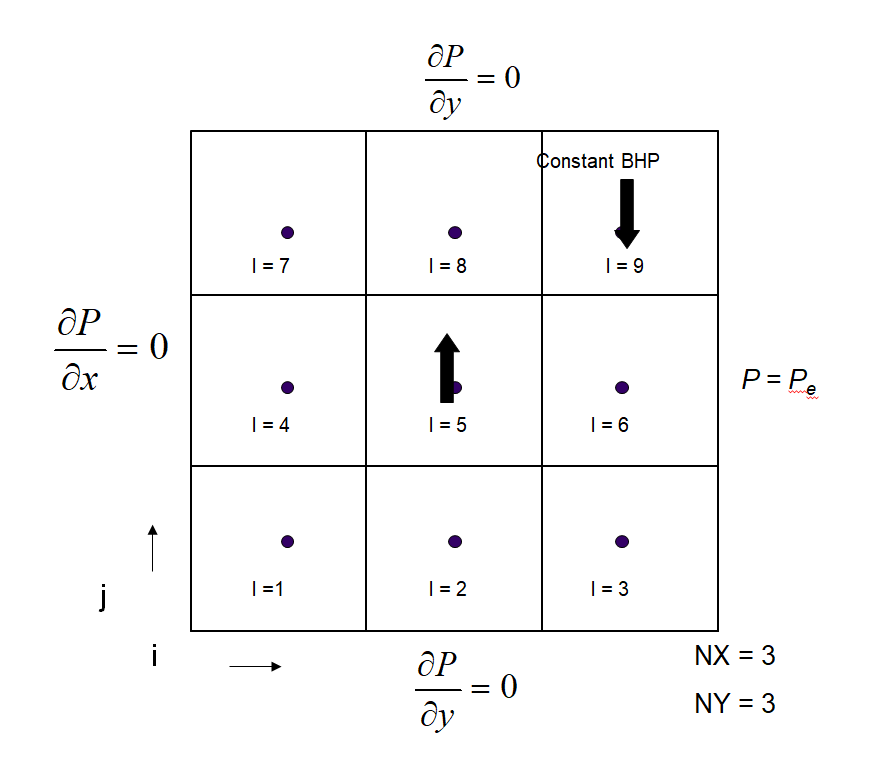

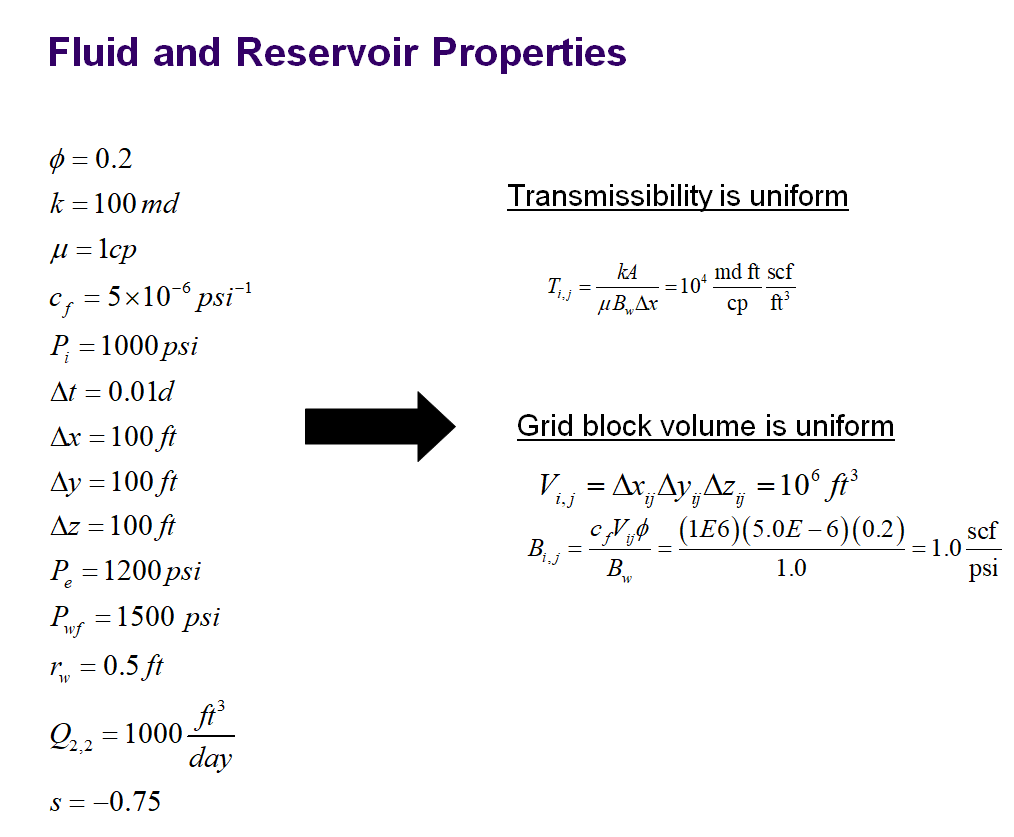

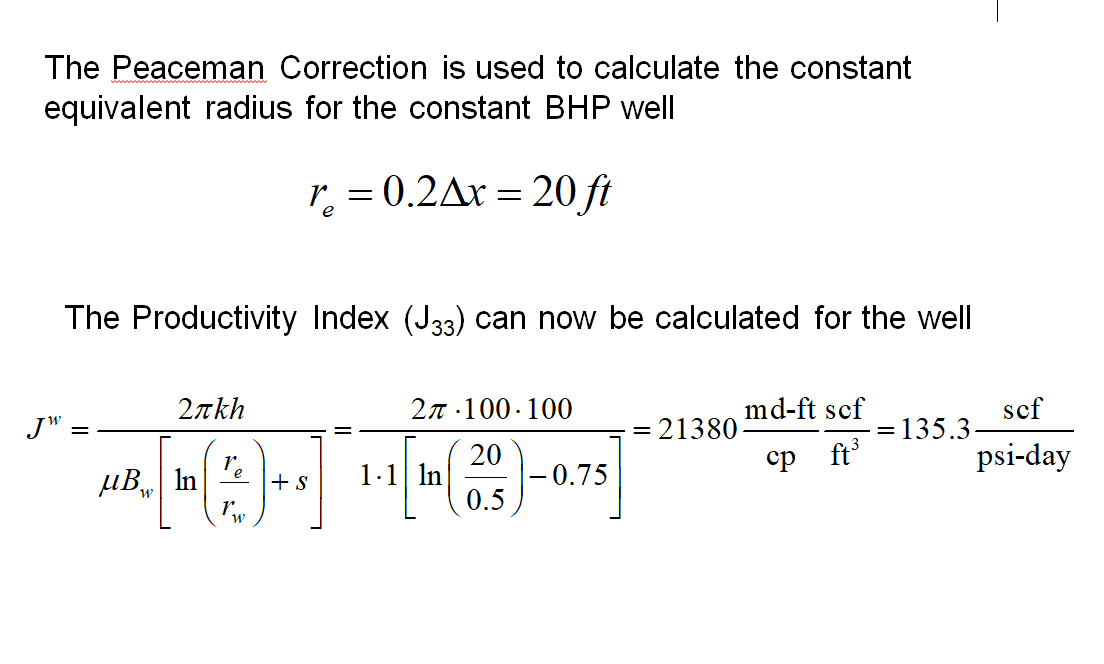

In [ ]:
T=10e3   #Transmissibility
nx=3
ny=3
dt=0.01
n=nx*ny

In [ ]:
import numpy as np
t=np.arange(9*9).reshape(9,9)*0
q=np.arange(9).reshape(9,1)*0
pi=np.arange(9*9).reshape(9,9)*0
p_initial=np.arange(9).reshape(9,1)*0+1000
b=np.arange(9*9).reshape(9,9)*0
for i in range(0,9):
 b[i][i]=1
print(b)

[[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]


In [ ]:
for i in range(0,n):
 if (i==0 or (i/nx)==nx-1): #Top left corner and bottom left corner with neuman boundary
  t[i][i]=2*T
  t[i][i+1]=-T
 elif ((i>0 and i<nx-1) or (i>n-nx and i<n-1)): #Top boundary and bottom boundary with neuman boundary
  t[i][i]=3*T
  t[i][i+1]=-T
  t[i][i-1]=-T
 elif (i==nx-1 or i==n-1): #Top right corner and bottom right corner with dirchlet boundary
  t[i][i]=4*T
  t[i][i-1]=-T
  q[i]=2*T*1200*6.33e-03
 elif (i>=nx and i%nx==0 and i<n-nx): # Remaining left side grids with neuman boundary
  t[i][i]=3*T
  t[i][i+1]=-T
 elif ((i%nx)==nx-1 and i>nx and i<n-1): #Remaining right side grids with dirchlet boundary
  t[i][i]=5*T
  t[i][i-1]=-T
  q[i]=2*T*1200*6.33e-03
 else:
  t[i][i]=4*T
  t[i][i+1]=-T
  t[i][i-1]=-T
for i in range(2*nx):
 t[i][i+nx]=-T
 t[i+nx][i]=-T


In [ ]:
t=t*6.33e-03
print(t)

[[126.6 -63.3   0.  -63.3   0.    0.    0.    0.    0. ]
 [-63.3 189.9 -63.3   0.  -63.3   0.    0.    0.    0. ]
 [  0.  -63.3 253.2   0.    0.  -63.3   0.    0.    0. ]
 [-63.3   0.    0.  189.9 -63.3   0.  -63.3   0.    0. ]
 [  0.  -63.3   0.  -63.3 253.2 -63.3   0.  -63.3   0. ]
 [  0.    0.  -63.3   0.  -63.3 316.5   0.    0.  -63.3]
 [  0.    0.    0.  -63.3   0.    0.  126.6 -63.3   0. ]
 [  0.    0.    0.    0.  -63.3   0.  -63.3 189.9 -63.3]
 [  0.    0.    0.    0.    0.  -63.3   0.  -63.3 253.2]]


In [ ]:
for i in range(0,2):
 a=int (input('Select the Type of well press 1 for constant rate well press 2 for constant BHP well: '))
 if (a==1):
  m=int (input('In which gird do you want drill: '))
  l=int (input('Rate of well: '))
  q[m-1]=-l
 if (a==2):
  m=int (input('In which gird do you want drill: '))
  p=int (input('well flowing pressure: '))
  ji=float (input('enter productivity index '))
  q[m-1]=q[m-1]+ji*p
  pi[m-1][m-1]=pi[i][i]+ji


Select the Type of well press 1 for constant rate well press 2 for constant BHP well: 1
In which gird do you want drill: 5
Rate of well: 1000
Select the Type of well press 1 for constant rate well press 2 for constant BHP well: 2
In which gird do you want drill: 9
well flowing pressure: 1500
enter productivity index 135.3


In [ ]:
x=np.arange(9).reshape(9,1)*0
print(x)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
print(b)

[[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]


In [ ]:
def jacobi(A,c,x,N):
 x=x.astype(float)
 for i in range(N):
  D=np.diag(np.diag(A))
  R=A-D
  k=np.dot(R,x)
  num=c-k
  den=D
  x=np.linalg.inv(den)@num
 return x

In [ ]:
for i in range (5):
 A=((b/dt)+t+pi)
 c=((b/dt)@p_initial)+q
 p_next=jacobi(A,c,x,10000)
 p_initial=p_next
 print('At time = ',i+1,p_next)


At time =  1 [[1013.34760153]
 [1032.2964387 ]
 [1097.85010482]
 [1015.4850227 ]
 [1036.71283993]
 [1113.68550476]
 [1020.8575377 ]
 [1059.18034921]
 [1213.46253289]]
At time =  2 [[1035.55599444]
 [1065.81456774]
 [1140.16728131]
 [1040.38177011]
 [1074.67165819]
 [1161.70633712]
 [1050.24901223]
 [1106.54828363]
 [1269.55504052]]
At time =  3 [[1060.95804901]
 [1094.24551925]
 [1161.23307205]
 [1067.80020685]
 [1105.46005202]
 [1183.96605924]
 [1080.29758544]
 [1140.26506388]
 [1288.30260988]]
At time =  4 [[1085.98739679]
 [1117.49596394]
 [1173.55264503]
 [1094.01966341]
 [1129.67841032]
 [1196.17681675]
 [1107.81412555]
 [1165.07863525]
 [1296.94332466]]
At time =  5 [[1108.93858341]
 [1136.57381066]
 [1181.88346402]
 [1117.56115492]
 [1149.03816295]
 [1204.12089693]
 [1131.89706834]
 [1184.27870498]
 [1302.23274737]]
